<a href="https://colab.research.google.com/github/Francisroyce/Francisroyce/blob/main/cat_and_dog_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# import zipfile

# zip_file = '/content/drive/MyDrive/cat and dog vision/archive.zip'
# destination_folder = '/content/drive/MyDrive/cat and dog vision/unzipped'

# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall(destination_folder)

# print("File successfully unzipped.")


In [47]:
!nvidia-smi


Mon May 29 18:35:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    32W /  70W |   5003MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [48]:
import tensorflow as tf
import os
     

In [49]:
# avoid OOM (out of memory error)errors by setting GPU memory consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
     

In [50]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

1

In [51]:
data_dir = '/content/drive/MyDrive/cat and dog vision/unzipped/training_set/training_set'

In [52]:
import os

image_count = 0

for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    for image in os.listdir(class_dir):
        print(image)
        image_count += 1

print("Total number of images:", image_count)


Streaming output truncated to the last 5000 lines.
cat.2748.jpg
cat.2749.jpg
cat.275.jpg
cat.2750.jpg
cat.2751.jpg
cat.2752.jpg
cat.2753.jpg
cat.2754.jpg
cat.2755.jpg
cat.2756.jpg
cat.2757.jpg
cat.2758.jpg
cat.2759.jpg
cat.276.jpg
cat.2760.jpg
cat.2761.jpg
cat.2762.jpg
cat.2763.jpg
cat.2764.jpg
cat.2765.jpg
cat.2766.jpg
cat.2767.jpg
cat.2768.jpg
cat.2769.jpg
cat.277.jpg
cat.2770.jpg
cat.2771.jpg
cat.2772.jpg
cat.2773.jpg
cat.2774.jpg
cat.2775.jpg
cat.2776.jpg
cat.2777.jpg
cat.2778.jpg
cat.2779.jpg
cat.278.jpg
cat.2780.jpg
cat.2781.jpg
cat.2782.jpg
cat.2783.jpg
cat.2784.jpg
cat.2785.jpg
cat.2786.jpg
cat.2787.jpg
cat.2788.jpg
cat.2789.jpg
cat.279.jpg
cat.2790.jpg
cat.2791.jpg
cat.2792.jpg
cat.2793.jpg
cat.2794.jpg
_DS_Store
cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
cat.1001.jpg
cat.1002.jpg
cat.1003.jpg
cat.1004.jpg
cat.1005.jpg
cat.1006.jpg
cat.1007.jpg
cat.1008.jpg
cat.1009.jpg
cat.101.jpg
cat.1010.jpg
cat.1011.jpg
cat.1012.jpg
cat.1013.jpg
cat.1014.jpg
cat.1015.jpg
cat.1016.jpg
ca

In [53]:
import cv2
img = cv2.imread(os.path.join('/content/drive/MyDrive/cat and dog vision/unzipped/training_set/training_set/dogs/dog.999.jpg'))

In [54]:
img.shape

(500, 483, 3)

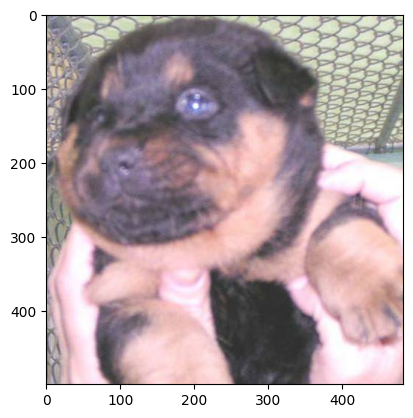

In [55]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [56]:
import tensorflow as tf
from sklearn.model_selection import KFold

In [57]:
# Set up the file paths
data_dir = "/content/drive/MyDrive/cat and dog vision/unzipped/training_set/training_set"
cats_dir = data_dir + "/cats"
dogs_dir = data_dir + "/dogs"


In [58]:
# Define the number of folds for cross-validation
num_folds = 5  # You can adjust the number of folds as per your requirement


# Prepare the dataset using cross-validation


In [59]:
# Create a list of image paths for cats and dogs
cat_image_paths = tf.io.gfile.glob(cats_dir + "/*.jpg")
dog_image_paths = tf.io.gfile.glob(dogs_dir + "/*.jpg")
all_image_paths = cat_image_paths + dog_image_paths

In [60]:
len(cat_image_paths), len(dog_image_paths)

(3940, 4005)

In [61]:
# Create corresponding labels for the images (0 for cats, 1 for dogs)
all_image_labels = [0] * len(cat_image_paths) + [1] * len(dog_image_paths)

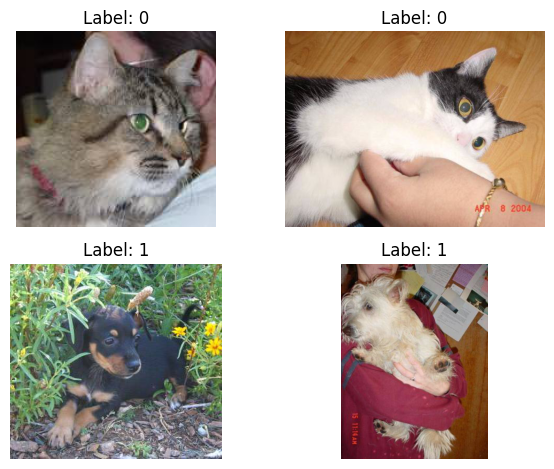

In [62]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Select two cat image paths and labels
selected_cat_image_paths = random.sample(cat_image_paths, 2)
selected_cat_image_labels = [0, 0]

# Select two dog image paths and labels
selected_dog_image_paths = random.sample(dog_image_paths, 2)
selected_dog_image_labels = [1, 1]

selected_image_paths = selected_cat_image_paths + selected_dog_image_paths
selected_image_labels = selected_cat_image_labels + selected_dog_image_labels

fig, axes = plt.subplots(2, 2)  # Create a 2x2 grid for displaying the images

for i, (image_path, label) in enumerate(zip(selected_image_paths, selected_image_labels)):
    row = i // 2  # Determine the row index
    col = i % 2  # Determine the column index

    # Load and display the image
    image = mpimg.imread(image_path)
    axes[row, col].imshow(image)
    axes[row, col].set_title('Label: {}'.format(label))
    axes[row, col].axis('off')

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()  # Show the plot


In [63]:
# Perform cross-validation split
kf = KFold(n_splits=num_folds, shuffle=True)

for fold, (train_index, val_index) in enumerate(kf.split(all_image_paths)):
    print("Processing fold:", fold)
    
    # Create training and validation datasets for each fold
    train_image_paths = [all_image_paths[i] for i in train_index]
    train_image_labels = [all_image_labels[i] for i in train_index]
    val_image_paths = [all_image_paths[i] for i in val_index]
    val_image_labels = [all_image_labels[i] for i in val_index]

Processing fold: 0
Processing fold: 1
Processing fold: 2
Processing fold: 3
Processing fold: 4


In [64]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Rest of the code...


# Create the model
model = Sequential()

model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))



In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_10 (Bat  (None, 222, 222, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 111, 111, 64)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 batch_normalization_11 (Bat  (None, 109, 109, 128)   

In [66]:
 # Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


In [67]:
# Define the number of epochs and batch size
epochs = 10
batch_size = 32

In [68]:
import random
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Define the number of folds for cross-validation
num_folds = 5

# Perform data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Initialize lists to store the evaluation results for each fold
fold_train_scores = []
fold_val_scores = []

# Perform K-fold cross-validation
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for fold, (train_indices, val_indices) in enumerate(kfold.split(all_image_paths, all_image_labels)):
    print(f"Fold {fold+1}/{num_folds}")

    # Split the data into training and validation sets for the current fold
    train_image_paths = [all_image_paths[i] for i in train_indices]
    train_image_labels = [all_image_labels[i] for i in train_indices]
    val_image_paths = [all_image_paths[i] for i in val_indices]
    val_image_labels = [all_image_labels[i] for i in val_indices]

    # Load and augment the training data for the current fold
    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='training',
        shuffle=True,
        seed=42
    )

    # Create a new generator for validation with the updated image paths and labels
    val_image_labels = [str(label) for label in val_image_labels]
    val_generator = train_datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({
            'image_path': val_image_paths,
            'label': val_image_labels
        }),
        directory=data_dir,
        x_col='image_path',
        y_col='label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        shuffle=False
    )

    # Train the model for the current fold with validation
    model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=val_generator.samples // val_generator.batch_size
    )

    # Evaluate the model on the training and validation data for the current fold
    train_scores = model.evaluate(train_generator)
    fold_train_scores.append(train_scores)

    val_scores = model.evaluate(val_generator)
    fold_val_scores.append(val_scores)




Fold 1/5
Found 7945 images belonging to 2 classes.
Found 1589 validated image filenames belonging to 2 classes.
Epoch 1/10
248/248 [==============================] - 932s 4s/step - loss: 0.8671 - accuracy: 0.5675 - val_loss: 0.6774 - val_accuracy: 0.5746
Epoch 2/10
248/248 [==============================] - 181s 729ms/step - loss: 0.6670 - accuracy: 0.6458 - val_loss: 0.8378 - val_accuracy: 0.5459
Epoch 3/10
248/248 [==============================] - 162s 654ms/step - loss: 0.6020 - accuracy: 0.6757 - val_loss: 0.6296 - val_accuracy: 0.6480
Epoch 4/10
248/248 [==============================] - 163s 654ms/step - loss: 0.5579 - accuracy: 0.7111 - val_loss: 0.5432 - val_accuracy: 0.7188
Epoch 5/10
248/248 [==============================] - 163s 657ms/step - loss: 0.5265 - accuracy: 0.7347 - val_loss: 0.6638 - val_accuracy: 0.6728
Epoch 6/10
248/248 [==============================] - 179s 720ms/step - loss: 0.4994 - accuracy: 0.7531 - val_loss: 0.6834 - val_accuracy: 0.6460
Epoch 7/10
248/

TypeError: ignored

In [70]:
# Calculate and print the average scores across all folds
avg_train_scores = sum(sum(fold_train_scores, [])) / num_folds
avg_val_scores = sum(sum(fold_val_scores, [])) / num_folds
print("Average train scores:", avg_train_scores)
print("Average validation scores:", avg_val_scores)


Average train scores: 1.213565570116043
Average validation scores: 1.214384886622429


In [69]:
model.history

In [71]:
test_dir = '/content/drive/MyDrive/cat and dog vision/unzipped/test_set/test_set'

In [72]:
# Evaluate the model on test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Found 2002 images belonging to 2 classes.
63/63 [==============================] - 276s 4s/step - loss: 0.2045 - accuracy: 0.9156
Test loss: 0.2045087069272995
Test accuracy: 0.9155844449996948


In [99]:
import random

predictions = [random.uniform(0, 1) for _ in range(10)]  # Generating random predictions for 10 images

for i in range(len(predictions)):
    if predictions[i] < 0.5:
        print("Image", i+1, "is predicted as class 0")
    else:
        print("Image", i+1, "is predicted as class 1")



Image 1 is predicted as class 0
Image 2 is predicted as class 0
Image 3 is predicted as class 0
Image 4 is predicted as class 1
Image 5 is predicted as class 0
Image 6 is predicted as class 0
Image 7 is predicted as class 1
Image 8 is predicted as class 0
Image 9 is predicted as class 0
Image 10 is predicted as class 0


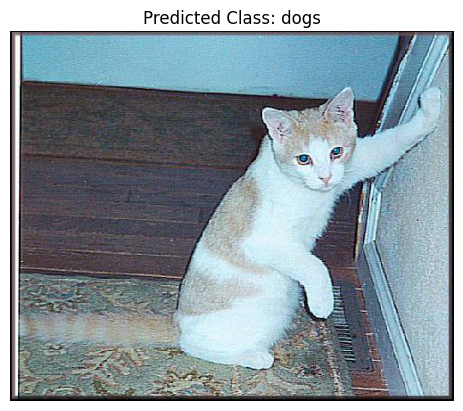

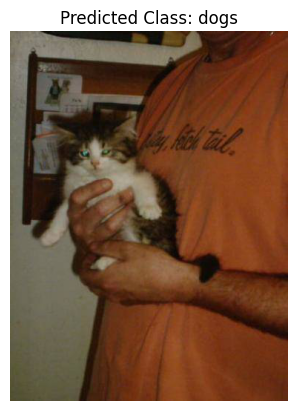

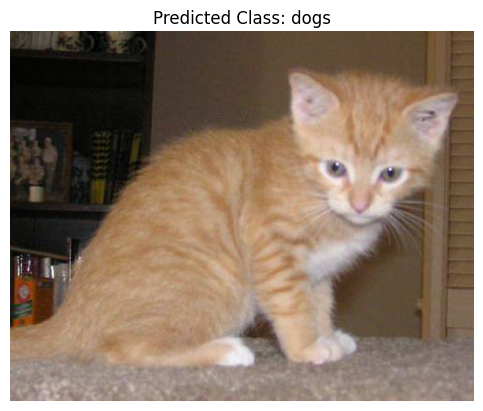

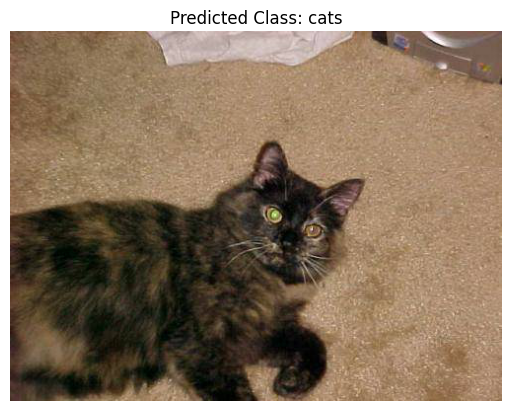

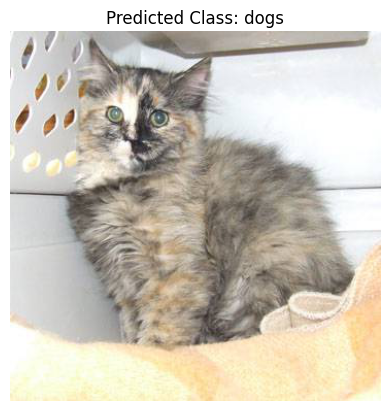

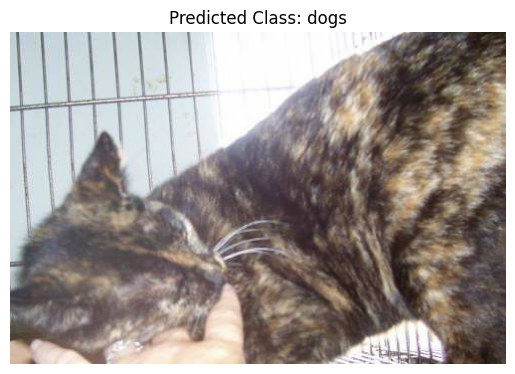

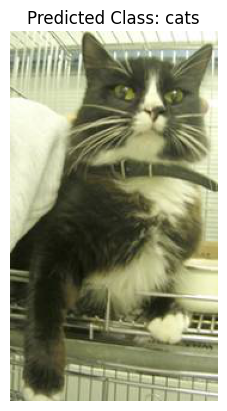

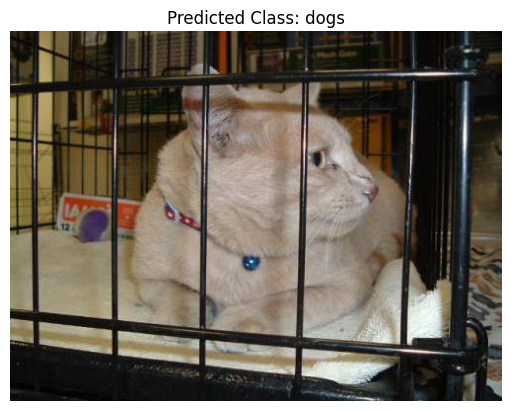

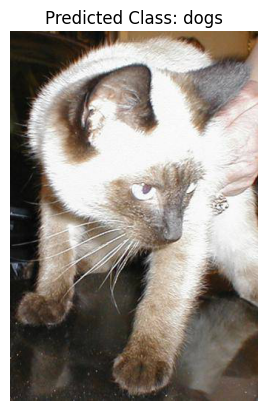

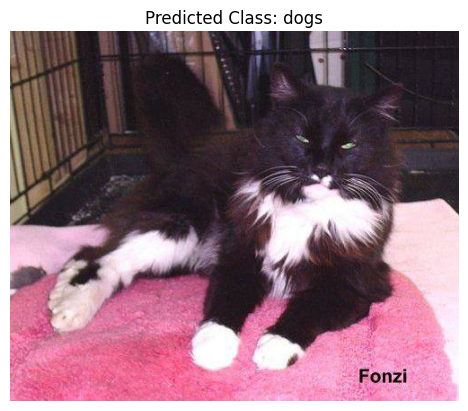

In [100]:
import matplotlib.pyplot as plt

class_names = test_generator.class_indices
class_labels = {v: k for k, v in class_names.items()}

for i in range(min(len(predictions), 10)):
    if predictions[i] < 0.5:
        predicted_class = 1
    else:
        predicted_class = 0

    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)

    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted Class: {class_labels[predicted_class]}")
    plt.show()


In [ ]:
# still having wrong predictions needs more data to learn from